Today we're going to look at x and y arrays, something that we'll need for training our text classifiers later.

Basically, for our dataset we have two essential pieces of information: First, the texts that we're working with. Second, the category that each text belongs to. We call our data that we use (texts) the *x array*. And we call the list of labels that each belongs to the *y array*. For example, in *scikit-learn* the convention is to talk about X and y. This just means the language and the labels!

In [1]:
from text_analytics import TextAnalytics
import os
import pandas as pd

ai = TextAnalytics()
ai.data_dir = os.path.join(".", "data")
print("Done!")

Done!


This time we're going to work with tweets nd web data that represent different countries around the world. So we first load this data into memory. This is quite a large corpus, so we will only work with the first rows.

In [2]:
file = os.path.join(ai.data_dir, "sociolinguistics.english_dialects.gz")
df = pd.read_csv(file, nrows = 1000)
print(df)
print("Done!")

    Register    Country                                               Text
0         cc  Australia  the strategy has been the installation of gros...
1         cc  Australia  of the war rather than merely the military one...
2         cc  Australia  conducted by dpi walkamin and the eacham shire...
3         cc  Australia  framework is now being developed by farmsafe a...
4         cc  Australia  m disappointed about the relative lack of anar...
..       ...        ...                                                ...
995       cc  Australia  stock research in marine ecology american eel ...
996       cc  Australia  issue for further discussion of em tv s polici...
997       cc  Australia  of print manila soil and land resources apprai...
998       cc  Australia  we want to work with all groups and health pro...
999       cc  Australia  of reproductive a number of environmental para...

[1000 rows x 3 columns]
Done!


Ok, so now we have our data. Instead of a full table or dataframe like this, we want to separate arrays. Here we select the x arrays (the corpus data) and the y arrays (the classes).

In [3]:
x = df.loc[:,'Text']
y = df.loc[:,"Country"]

print(x)
print(y)

0      the strategy has been the installation of gros...
1      of the war rather than merely the military one...
2      conducted by dpi walkamin and the eacham shire...
3      framework is now being developed by farmsafe a...
4      m disappointed about the relative lack of anar...
                             ...                        
995    stock research in marine ecology american eel ...
996    issue for further discussion of em tv s polici...
997    of print manila soil and land resources apprai...
998    we want to work with all groups and health pro...
999    of reproductive a number of environmental para...
Name: Text, Length: 1000, dtype: object
0      Australia
1      Australia
2      Australia
3      Australia
4      Australia
         ...    
995    Australia
996    Australia
997    Australia
998    Australia
999    Australia
Name: Country, Length: 1000, dtype: object


So, later, when we use *scikit-learn* or *tensorflow* to build models, we can use this syntax to get our respective x and y arrays. Of course, we can't train a classifier on the text alone: we have to vectorize it first. So here we convert the x array into features using a function from our *text_analytics* package.

In [4]:
x, vocab_size = ai.get_features(df, features = "style")
print(x)
print(vocab_size)

  (0, 0)	58
  (0, 1)	32
  (0, 2)	25
  (0, 3)	31
  (0, 4)	19
  (0, 5)	14
  (0, 6)	1
  (0, 7)	6
  (0, 8)	7
  (0, 9)	5
  (0, 10)	7
  (0, 11)	3
  (0, 12)	7
  (0, 13)	10
  (0, 14)	3
  (0, 15)	14
  (0, 16)	4
  (0, 17)	8
  (0, 19)	3
  (0, 20)	4
  (0, 21)	6
  (0, 22)	9
  (0, 24)	6
  (0, 25)	5
  (0, 26)	3
  :	:
  (999, 151)	1
  (999, 159)	1
  (999, 160)	2
  (999, 161)	1
  (999, 163)	1
  (999, 166)	2
  (999, 167)	1
  (999, 171)	1
  (999, 176)	1
  (999, 198)	1
  (999, 200)	1
  (999, 202)	1
  (999, 204)	1
  (999, 205)	1
  (999, 219)	1
  (999, 228)	1
  (999, 239)	1
  (999, 248)	1
  (999, 250)	1
  (999, 251)	2
  (999, 286)	1
  (999, 290)	2
  (999, 295)	3
  (999, 299)	1
  (999, 319)	1
10095


Now we have a vector representation for each text, containing 10,095 dimensions or features. We will learn about different types of representations in future labs:

    *style*           Function word n-grams to represent stylistic choices
    *sentiment*       Positive and negative words to represent emotion or sentiment
    *content*         Weighted content terms to represent topic
    *constructions*   Syntactic features to represent linguistic structure

Our case-study in the chapter comes from dialect classification using construction features. We can extract this kind of feature using the code below. This syntactic feature requires both syntactic and semantic parsing, so it takes awhile and we will just look at a few samples.

In [5]:
x, vocab_size = ai.get_features(df.head(2), features = "constructions")
print(x)
print(vocab_size)

  (0, 8)	1
  (0, 26)	1
  (0, 51)	1
  (0, 58)	1
  (0, 65)	1
  (0, 87)	1
  (0, 98)	1
  (0, 108)	2
  (0, 122)	2
  (0, 123)	1
  (0, 129)	1
  (0, 155)	2
  (0, 169)	1
  (0, 185)	1
  (0, 187)	1
  (0, 195)	9
  (0, 223)	1
  (0, 255)	1
  (0, 258)	18
  (0, 263)	1
  (0, 270)	1
  (0, 286)	1
  (0, 338)	1
  (0, 343)	3
  (0, 365)	1
  :	:
  (1, 19377)	1
  (1, 19396)	1
  (1, 19401)	1
  (1, 19408)	1
  (1, 19448)	1
  (1, 19471)	1
  (1, 19504)	1
  (1, 19522)	1
  (1, 19534)	1
  (1, 19546)	4
  (1, 19565)	3
  (1, 19567)	1
  (1, 19568)	3
  (1, 19570)	1
  (1, 19573)	1
  (1, 19589)	2
  (1, 19631)	3
  (1, 19638)	1
  (1, 19653)	1
  (1, 19656)	3
  (1, 19674)	2
  (1, 19678)	2
  (1, 19693)	1
  (1, 19704)	1
  (1, 19712)	3
19713


These numbers represent the frequency of different constructions. Let's take a look at some example constructions.

In [6]:
import codecs
import random

cxg = {}
file = os.path.join(ai.data_dir, "cxg_examples.eng.Wiki.txt")
with codecs.open(file, "r", encoding = "utf-8") as f:
    for line in f:
        
        if len(line) > 3:
            if line[0] != "\t":
                construction = line.split("\t")[1]
                cxg[construction] = []
                
            else:
                token = line.split("\t")[-1]
                cxg[construction].append(token)

In [7]:
construction = random.choice(list(cxg.keys()))
print(construction)

for token in cxg[construction][:5]:
    print(token)

[ ADV -- VERB -- on ]

['possibly', 'drew', 'on']

['then', 'buried', 'on']

['then', 'won', 'on']

['then', 'went', 'on']

['right', 'speaking', 'on']



So, these construction features are little usage-based syntactic structures. How well do they capture differences between dialects? Let's take a look at the classification accuracy, as evaluated on a held-out test set. This model is trained using Logistic Regression, as described in future sections.

In [8]:
file = os.path.join(ai.data_dir, "dialect_results.csv")
results_df = pd.read_csv(file, nrows=12)
print(results_df)

           Country  Precision  Recall  F1-Score  Support
0        Australia       0.87    0.88      0.88     3044
1           Canada       0.89    0.88      0.89     3012
2            India       0.97    0.98      0.98     2950
3          Ireland       0.97    0.96      0.97     3063
4         Malaysia       1.00    0.99      1.00     1616
5      New Zealand       0.89    0.89      0.89     3030
6          Nigeria       0.98    0.98      0.98     2700
7         Pakistan       0.98    0.98      0.98     2933
8      Philippines       0.98    0.98      0.98     1750
9     South Africa       0.95    0.95      0.95     3007
10  United Kingdom       0.91    0.93      0.92     3011
11   United States       0.89    0.90      0.90     2970


"Support" here means the number of samples in the test set for each class. So, there are 33,086 total test samples. Let's use this to make the figures that we saw in the section.

(0.0, 1.0)

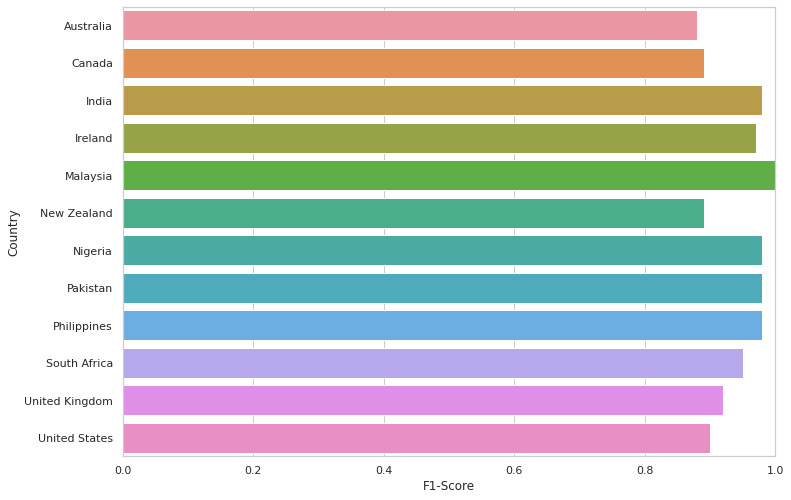

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set_theme(style="whitegrid")

sns.barplot(y="Country", x="F1-Score", data=results_df)

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
plt.xlim(0, 1)

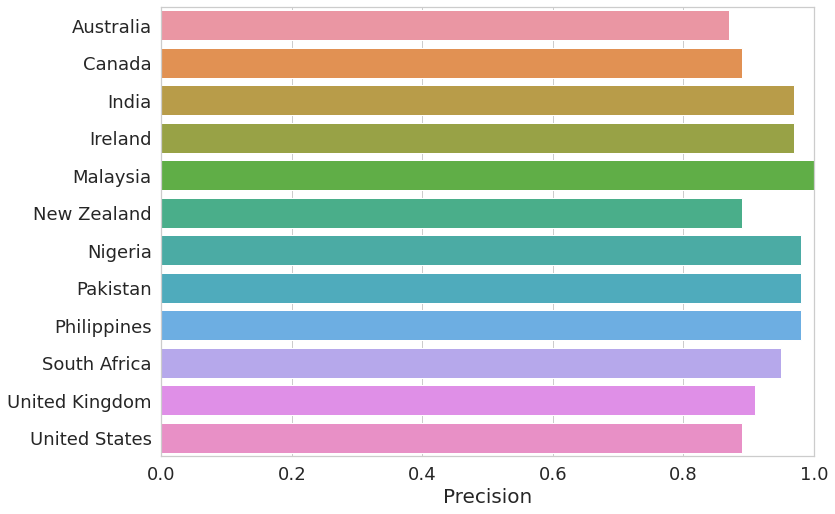

In [10]:
sns.barplot(y="Country", x="Precision", data=results_df)

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
plt.xlim(0, 1)
plt.xlabel("Precision",size=20)
plt.ylabel("",size=20)
plt.tick_params(axis='both', which='major', labelsize=18)

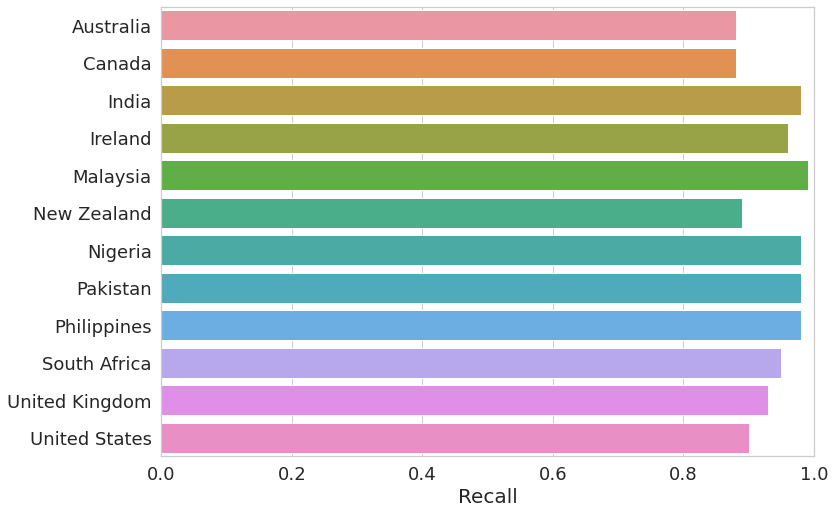

In [11]:
sns.barplot(y="Country", x="Recall", data=results_df)

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
plt.xlim(0, 1)
plt.xlabel("Recall",size=20)
plt.ylabel("",size=20)
plt.tick_params(axis='both', which='major', labelsize=18)

These results model a dialect using tweets from a certain location. But how well does that digital data represent the actual population of language users? One way to ask this question is to model the same dialects using an alternate source of representations: data from the web. This is an independent set of observations. If the results mostly agree, that indicates that we have two separate sources that represent the same syntactic patterns.

In [12]:
file = os.path.join(ai.data_dir, "dialect_results_web.csv")
results_web_df = pd.read_csv(file, nrows=12)
print(results_web_df)

           Country  Precision  Recall  F1-Score  Support
0        Australia       0.89    0.91      0.90     5718
1           Canada       0.92    0.91      0.91     5962
2            India       0.96    0.97      0.97     6051
3          Ireland       0.98    0.97      0.98     5939
4         Malaysia       0.98    0.96      0.97     4660
5      New Zealand       0.86    0.88      0.87     5902
6          Nigeria       0.97    0.98      0.97     5702
7         Pakistan       0.99    0.98      0.98     6022
8      Philippines       0.98    0.97      0.98     4785
9     South Africa       0.94    0.93      0.94     2997
10  United Kingdom       0.91    0.90      0.91     2904
11   United States       0.90    0.89      0.89     3112


           Country  Precision  Recall  F1-Score  Support Source
0        Australia       0.87    0.88      0.88     3044     TW
1           Canada       0.89    0.88      0.89     3012     TW
2            India       0.97    0.98      0.98     2950     TW
3          Ireland       0.97    0.96      0.97     3063     TW
4         Malaysia       1.00    0.99      1.00     1616     TW
5      New Zealand       0.89    0.89      0.89     3030     TW
6          Nigeria       0.98    0.98      0.98     2700     TW
7         Pakistan       0.98    0.98      0.98     2933     TW
8      Philippines       0.98    0.98      0.98     1750     TW
9     South Africa       0.95    0.95      0.95     3007     TW
10  United Kingdom       0.91    0.93      0.92     3011     TW
11   United States       0.89    0.90      0.90     2970     TW
0        Australia       0.89    0.91      0.90     5718    WEB
1           Canada       0.92    0.91      0.91     5962    WEB
2            India       0.96    0.97   

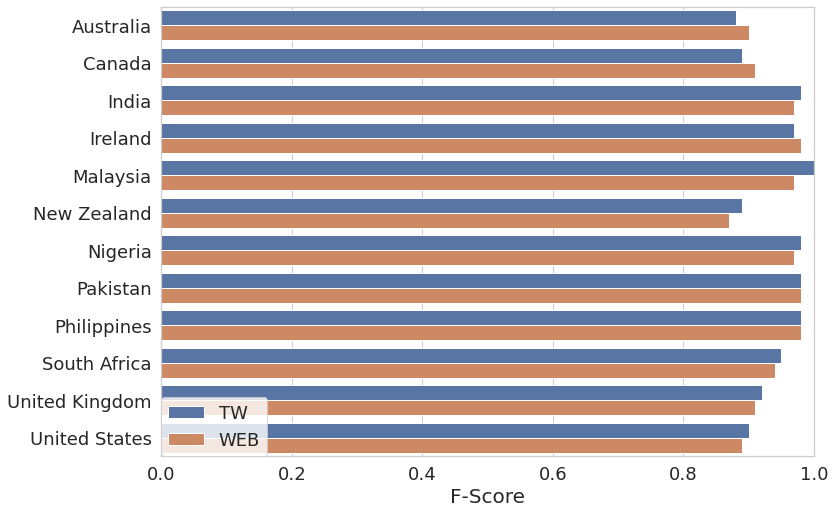

In [13]:
results_df["Source"] = "TW"
results_web_df["Source"] = "WEB"
joint_df = pd.concat([results_df, results_web_df], axis=0)
print(joint_df)

sns.barplot(y="Country", x="F1-Score", hue="Source", data=joint_df)

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
plt.xlim(0, 1)
plt.xlabel("F-Score",size=20)
plt.ylabel("",size=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(loc='lower left', fontsize=18, borderaxespad=0)

When we compare the dialect models we get from these two sources, they very closely overlap. This gives us confidence because we are seeing agreement between two independent sources of data.